# 재미있는 데이터셋 구하기
### 케이글닷컴 
* https://www.kaggle.com/datasets
* Kernels 메뉴에 들어가면 데이터분석 소스프로그램 다운 가능

### 공공데이터포털
* https://www.data.go.kr/

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from scipy.stats import linregress

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
%cd 06_rawData
%ls -la zz_*.csv

C:\Users\user\Documents\Anaconda_Src\데이터분석\06_rawData
 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3CBD-1374

 C:\Users\user\Documents\Anaconda_Src\데이터분석\06_rawData 디렉터리


 C:\Users\user\Documents\Anaconda_Src\데이터분석\06_rawData 디렉터리

2016-11-04  오후 09:53           876,581 zz_county_facts.csv
2016-11-04  오후 09:53             2,750 zz_county_facts_dictionary.csv
2016-11-04  오후 09:53         1,628,962 zz_primary_results.csv
               3개 파일           2,508,293 바이트
               0개 디렉터리  33,323,413,504 바이트 남음


In [3]:
%cd ..
%pwd

C:\Users\user\Documents\Anaconda_Src\데이터분석


'C:\\Users\\user\\Documents\\Anaconda_Src\\데이터분석'

In [4]:
# source data
pr      = pd.read_csv('06_rawData/zz_primary_results.csv')
facts   = pd.read_csv('06_rawData/zz_county_facts.csv')
cf_dict = pd.read_csv('06_rawData/zz_county_facts_dictionary.csv')

In [5]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 8 columns):
state                 24611 non-null object
state_abbreviation    24611 non-null object
county                24611 non-null object
fips                  24511 non-null float64
party                 24611 non-null object
candidate             24611 non-null object
votes                 24611 non-null int64
fraction_votes        24611 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB


In [6]:
facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 54 columns):
fips                  3195 non-null int64
area_name             3195 non-null object
state_abbreviation    3143 non-null object
PST045214             3195 non-null int64
PST040210             3195 non-null int64
PST120214             3195 non-null float64
POP010210             3195 non-null int64
AGE135214             3195 non-null float64
AGE295214             3195 non-null float64
AGE775214             3195 non-null float64
SEX255214             3195 non-null float64
RHI125214             3195 non-null float64
RHI225214             3195 non-null float64
RHI325214             3195 non-null float64
RHI425214             3195 non-null float64
RHI525214             3195 non-null float64
RHI625214             3195 non-null float64
RHI725214             3195 non-null float64
RHI825214             3195 non-null float64
POP715213             3195 non-null float64
POP645213             3

In [7]:
cf_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
column_name    51 non-null object
description    51 non-null object
dtypes: object(2)
memory usage: 896.0+ bytes


In [8]:
pr.head(10)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
8,Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


In [9]:
facts.head(10)

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9
7,1011,Bullock County,AL,10764,10915,-1.4,10914,6.3,21.4,14.9,...,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5
8,1013,Butler County,AL,20296,20946,-3.1,20947,6.1,23.6,18.0,...,0.0,0.0,399132,56712,229277,11326,28427,2,776.83,27.0
9,1015,Calhoun County,AL,115916,118586,-2.3,118572,5.7,22.2,16.0,...,0.5,24.7,2679991,0,1542981,13678,186533,114,605.87,195.7


In [10]:
facts=facts.set_index('fips')
facts.head(10)

,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,,,,,,,,,,,,,,,,,,,,,
0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,45.9,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,50.5,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9
1011,Bullock County,AL,10764,10915,-1.4,10914,6.3,21.4,14.9,45.3,...,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5
1013,Butler County,AL,20296,20946,-3.1,20947,6.1,23.6,18.0,53.6,...,0.0,0.0,399132,56712,229277,11326,28427,2,776.83,27.0


In [11]:
cf_dict.head(10)

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"
5,AGE295214,"Persons under 18 years, percent, 2014"
6,AGE775214,"Persons 65 years and over, percent, 2014"
7,SEX255214,"Female persons, percent, 2014"
8,RHI125214,"White alone, percent, 2014"
9,RHI225214,"Black or African American alone, percent, 2014"


In [12]:
cf_dict=cf_dict.set_index('column_name')
cf_dict.head(10)

,description
column_name,
PST045214,"Population, 2014 estimate"
PST040210,"Population, 2010 (April 1) estimates base"
PST120214,"Population, percent change - April 1, 2010 to ..."
POP010210,"Population, 2010"
AGE135214,"Persons under 5 years, percent, 2014"
AGE295214,"Persons under 18 years, percent, 2014"
AGE775214,"Persons 65 years and over, percent, 2014"
SEX255214,"Female persons, percent, 2014"
RHI125214,"White alone, percent, 2014"


In [13]:
pr['candidate'].unique()

array(['Bernie Sanders', 'Hillary Clinton', 'Ben Carson', 'Donald Trump',
       'John Kasich', 'Marco Rubio', 'Ted Cruz', ' Uncommitted',
       "Martin O'Malley", 'Carly Fiorina', 'Chris Christie', 'Jeb Bush',
       'Mike Huckabee', 'Rand Paul', 'Rick Santorum', ' No Preference'], dtype=object)

In [14]:
tmp = pr[['fips', 'candidate','fraction_votes']]
tmp = tmp.drop_duplicates(['fips','candidate'])

pr_piv = tmp.pivot('fips', 'candidate', 'fraction_votes')
pr_piv.head(10)

candidate,No Preference,Uncommitted,Ben Carson,Bernie Sanders,Carly Fiorina,Chris Christie,Donald Trump,Hillary Clinton,Jeb Bush,John Kasich,Marco Rubio,Martin O'Malley,Mike Huckabee,Rand Paul,Rick Santorum,Ted Cruz
fips,,,,,,,,,,,,,,,,
NaN,NaN,NaN,0.025512,0.631857,0.043959,0.06548,0.36011,0.368143,0.113691,0.160921,0.098384,NaN,NaN,NaN,NaN,0.131942
1001.0,NaN,NaN,0.146000,0.182000,NaN,NaN,0.44500,0.800000,NaN,0.035000,0.148000,NaN,NaN,NaN,NaN,0.205000
1003.0,NaN,NaN,0.084000,0.329000,NaN,NaN,0.46900,0.647000,NaN,0.059000,0.193000,NaN,NaN,NaN,NaN,0.170000
1005.0,NaN,NaN,0.122000,0.078000,NaN,NaN,0.50100,0.906000,NaN,0.036000,0.146000,NaN,NaN,NaN,NaN,0.179000
1007.0,NaN,NaN,0.099000,0.197000,NaN,NaN,0.49400,0.755000,NaN,0.021000,0.112000,NaN,NaN,NaN,NaN,0.255000
1009.0,NaN,NaN,0.100000,0.386000,NaN,NaN,0.48700,0.551000,NaN,0.022000,0.122000,NaN,NaN,NaN,NaN,0.244000
1011.0,NaN,NaN,0.085000,0.066000,NaN,NaN,0.56500,0.913000,NaN,0.042000,0.116000,NaN,NaN,NaN,NaN,0.170000
1013.0,NaN,NaN,0.118000,0.065000,NaN,NaN,0.53800,0.921000,NaN,0.027000,0.133000,NaN,NaN,NaN,NaN,0.167000
1015.0,NaN,NaN,0.118000,0.218000,NaN,NaN,0.45100,0.765000,NaN,0.048000,0.163000,NaN,NaN,NaN,NaN,0.194000


In [15]:
pr_piv.drop(' No Preference', axis=1, inplace=True)
pr_piv.drop(' Uncommitted', axis=1, inplace=True)
pr_piv.head(10)

candidate,Ben Carson,Bernie Sanders,Carly Fiorina,Chris Christie,Donald Trump,Hillary Clinton,Jeb Bush,John Kasich,Marco Rubio,Martin O'Malley,Mike Huckabee,Rand Paul,Rick Santorum,Ted Cruz
fips,,,,,,,,,,,,,,
NaN,0.025512,0.631857,0.043959,0.06548,0.36011,0.368143,0.113691,0.160921,0.098384,NaN,NaN,NaN,NaN,0.131942
1001.0,0.146000,0.182000,NaN,NaN,0.44500,0.800000,NaN,0.035000,0.148000,NaN,NaN,NaN,NaN,0.205000
1003.0,0.084000,0.329000,NaN,NaN,0.46900,0.647000,NaN,0.059000,0.193000,NaN,NaN,NaN,NaN,0.170000
1005.0,0.122000,0.078000,NaN,NaN,0.50100,0.906000,NaN,0.036000,0.146000,NaN,NaN,NaN,NaN,0.179000
1007.0,0.099000,0.197000,NaN,NaN,0.49400,0.755000,NaN,0.021000,0.112000,NaN,NaN,NaN,NaN,0.255000
1009.0,0.100000,0.386000,NaN,NaN,0.48700,0.551000,NaN,0.022000,0.122000,NaN,NaN,NaN,NaN,0.244000
1011.0,0.085000,0.066000,NaN,NaN,0.56500,0.913000,NaN,0.042000,0.116000,NaN,NaN,NaN,NaN,0.170000
1013.0,0.118000,0.065000,NaN,NaN,0.53800,0.921000,NaN,0.027000,0.133000,NaN,NaN,NaN,NaN,0.167000
1015.0,0.118000,0.218000,NaN,NaN,0.45100,0.765000,NaN,0.048000,0.163000,NaN,NaN,NaN,NaN,0.194000


In [16]:
pr_facts=pd.merge(pr_piv, facts, right_index=True, left_index=True)
pr_facts.head(10)

candidate,Ben Carson,Bernie Sanders,Carly Fiorina,Chris Christie,Donald Trump,Hillary Clinton,Jeb Bush,John Kasich,Marco Rubio,Martin O'Malley,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,,,,,,,,,,,,,,,,,,,,,
1001.0,0.146,0.182,NaN,NaN,0.445,0.800,NaN,0.035,0.148,NaN,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1003.0,0.084,0.329,NaN,NaN,0.469,0.647,NaN,0.059,0.193,NaN,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
1005.0,0.122,0.078,NaN,NaN,0.501,0.906,NaN,0.036,0.146,NaN,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
1007.0,0.099,0.197,NaN,NaN,0.494,0.755,NaN,0.021,0.112,NaN,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
1009.0,0.100,0.386,NaN,NaN,0.487,0.551,NaN,0.022,0.122,NaN,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9
1011.0,0.085,0.066,NaN,NaN,0.565,0.913,NaN,0.042,0.116,NaN,...,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5
1013.0,0.118,0.065,NaN,NaN,0.538,0.921,NaN,0.027,0.133,NaN,...,0.0,0.0,399132,56712,229277,11326,28427,2,776.83,27.0
1015.0,0.118,0.218,NaN,NaN,0.451,0.765,NaN,0.048,0.163,NaN,...,0.5,24.7,2679991,0,1542981,13678,186533,114,605.87,195.7
1017.0,0.131,0.095,NaN,NaN,0.476,0.886,NaN,0.037,0.131,NaN,...,0.0,29.3,667283,0,264650,7620,23237,8,596.53,57.4


In [17]:
pr_facts=pr_facts.dropna()
pr_facts.head(10)

candidate,Ben Carson,Bernie Sanders,Carly Fiorina,Chris Christie,Donald Trump,Hillary Clinton,Jeb Bush,John Kasich,Marco Rubio,Martin O'Malley,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
fips,,,,,,,,,,,,,,,,,,,,,
19001.0,0.150,0.440,0.039,0.010,0.256,0.560,0.010,0.005,0.197,0.000,...,0.0,0.0,0,29361,49644,6546,4128,8,569.27,13.5
19003.0,0.110,0.432,0.059,0.004,0.249,0.568,0.026,0.037,0.172,0.000,...,0.0,0.0,0,14217,32586,7950,0,1,423.44,9.5
19005.0,0.112,0.493,0.079,0.006,0.281,0.507,0.016,0.003,0.191,0.000,...,0.0,22.8,0,154490,128662,8922,8456,41,639.08,22.4
19007.0,0.110,0.453,0.011,0.005,0.348,0.547,0.015,0.005,0.107,0.000,...,0.0,0.0,151576,23061,133534,10331,7996,6,497.29,25.9
19009.0,0.088,0.375,0.011,0.003,0.265,0.625,0.027,0.013,0.150,0.000,...,0.0,0.0,0,47778,37302,6083,0,5,442.96,13.8
19011.0,0.105,0.440,0.021,0.014,0.251,0.560,0.007,0.017,0.150,0.000,...,0.0,31.2,176791,213218,176434,6645,9616,28,716.27,36.4
19013.0,0.084,0.529,0.022,0.018,0.230,0.467,0.030,0.009,0.262,0.002,...,0.6,29.1,5880301,1278450,1929430,15224,194601,314,565.77,231.7
19015.0,0.101,0.550,0.004,0.023,0.234,0.450,0.018,0.013,0.182,0.000,...,0.0,0.0,161292,0,210610,8009,16172,44,571.57,46.0
19017.0,0.090,0.453,0.016,0.011,0.233,0.533,0.026,0.034,0.261,0.013,...,0.0,30.5,699712,105620,268428,11358,16655,74,435.48,55.7


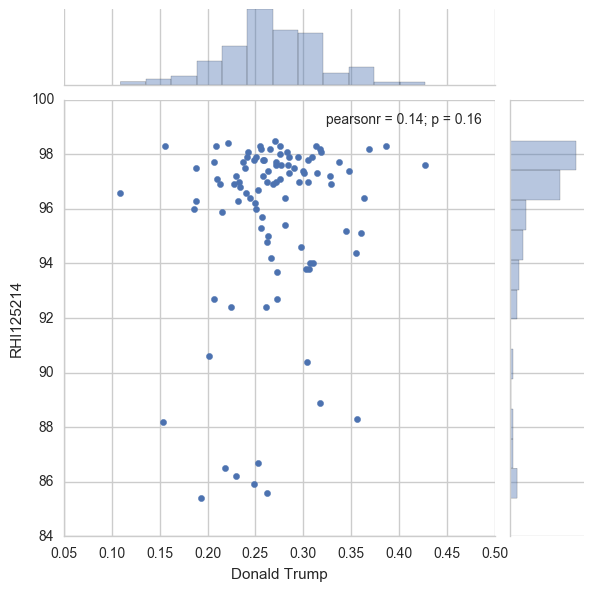

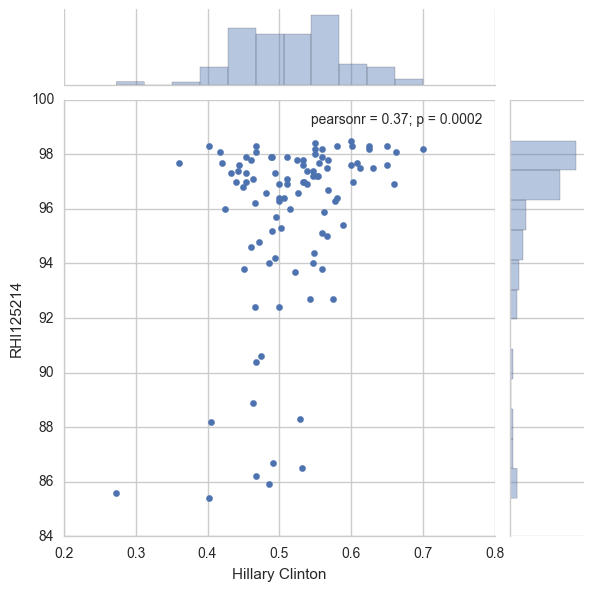

In [18]:
#White alone, percent, 2014
sns_plot = sns.jointplot('Donald Trump','RHI125214',pr_facts,kind='scatter')

#White alone, percent, 2014
sns_plot = sns.jointplot('Hillary Clinton','RHI125214',pr_facts,kind='scatter')

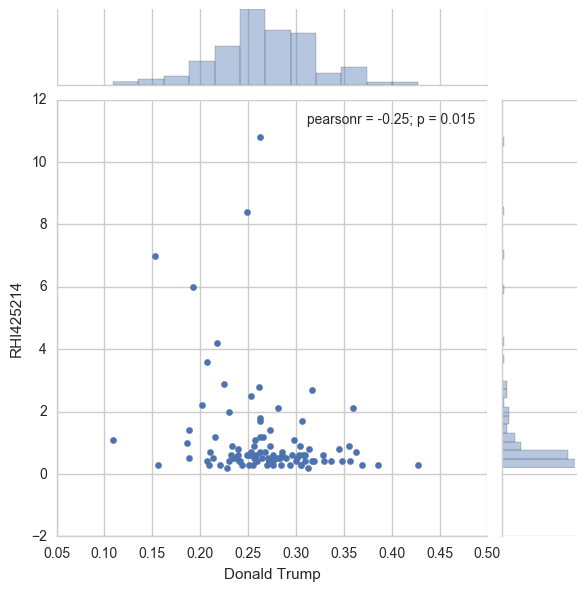

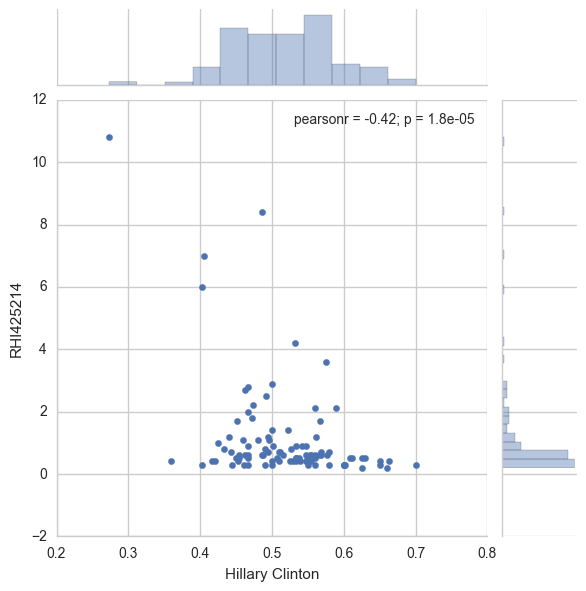

In [19]:
#Asian  alone, percent, 2014
sns_plot = sns.jointplot('Donald Trump','RHI425214',pr_facts,kind='scatter')

#Asian  alone, percent, 2014
sns_plot = sns.jointplot('Hillary Clinton','RHI425214',pr_facts,kind='scatter')

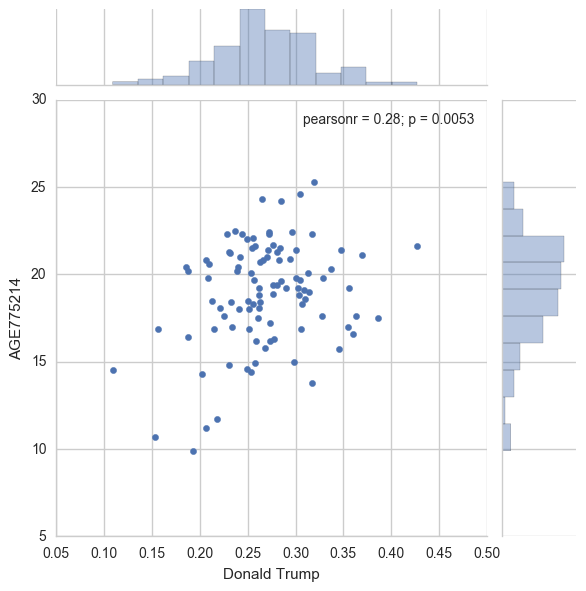

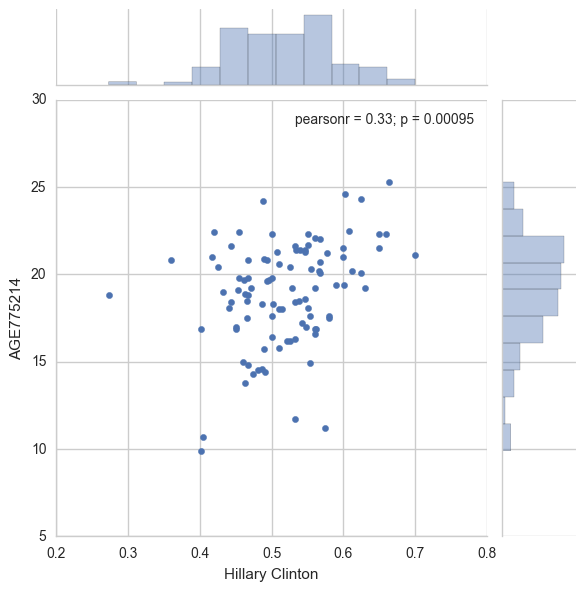

In [20]:
#Persons 65 years and over, percent, 2014
sns_plot = sns.jointplot('Donald Trump','AGE775214',pr_facts,kind='scatter')

sns_plot = sns.jointplot('Hillary Clinton','AGE775214',pr_facts,kind='scatter')